# Tickets by Gender

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
traffic_tickets = pd.read_pickle("clean_data.pkl")

len(traffic_tickets)

5929615

In [3]:
# Thanks https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
# for  `make_autopct()`
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total / 100))
        return '{v:,} \n ({p:.2f}%)'.format(p=pct,v=val)
    return my_autopct

## Traffic Tickets by Gender

View gender categories

In [4]:
total_tickets_by_gender = traffic_tickets.Gender.value_counts()

total_tickets_by_gender

M    4185075
F    1744540
Name: Gender, dtype: int64

Plot total tickets by gender

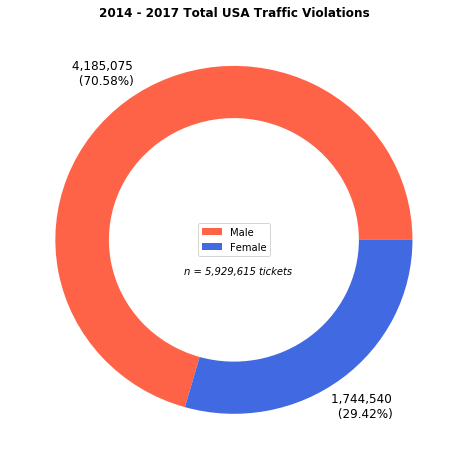

In [5]:
gender_pie_plot, ax = plt.subplots(figsize=(8,8))

total_tickets_by_gender.plot(
    kind="pie",                      
    wedgeprops=dict(width=0.3), 
    colors=["tomato", "royalblue"],
    labels=None,
    autopct=make_autopct(traffic_tickets.Gender.value_counts()),
    pctdistance=1.2,    
    textprops={"fontsize": 12}    
)

ax.set_title("2014 - 2017 Total USA Traffic Violations",              
             fontdict={"fontweight": "bold"})
ax.set_ylabel('')
ax.legend(labels=["Male", "Female"], loc="center")
ax.text(-0.28, -0.2, "n = {:,} tickets".format(len(traffic_tickets)), style='italic')

Save `gender_pie_plot`

In [6]:
gender_pie_plot.savefig("gender-pie.jpg", bbox_inches="tight", dpi=120, pad_inches=0.2)

## Top 10 Violations by Gender

View most common male violations

In [6]:
top_male_violations = traffic_tickets.loc[traffic_tickets.Gender == "M"] \
                        .Violation \
                        .value_counts()[:10]
        
top_male_violations

SPEED IN ZONE                            424929
DISOBEYED TRAFFIC DEVICE                 295505
SPEED OVER 55 ZONE                       202716
UNINSPECTED MOTOR VEHICLE                199555
SIDEWINGS/SIDEWINDOWS/NON/TRANSPARENT    198951
OPERATING MV MOBILE PHONE                146255
UNLICENSED OPERATOR                      144414
SPEED IN ZONE 11-30                      137112
FLD TO STOP AT STOP SIGN                 127007
NO SEAT BELT ADULT                       101432
Name: Violation, dtype: int64

View most common female violations

In [8]:
top_female_violations = traffic_tickets.loc[traffic_tickets.Gender == "F"] \
                        .Violation \
                        .value_counts()[:10]
top_female_violations

SPEED IN ZONE                            259283
DISOBEYED TRAFFIC DEVICE                 117045
SPEED OVER 55 ZONE                       108695
UNINSPECTED MOTOR VEHICLE                 98703
OPERATING MV MOBILE PHONE                 77630
NO/INADEQUATE HEADLAMPS                   60406
UNLICENSED OPERATOR                       59340
FLD TO STOP AT STOP SIGN                  58747
OPER MV WHILE USING PORTABLE ELEC DEV     48578
SIDEWINGS/SIDEWINDOWS/NON/TRANSPARENT     44712
Name: Violation, dtype: int64

Plot most common violations

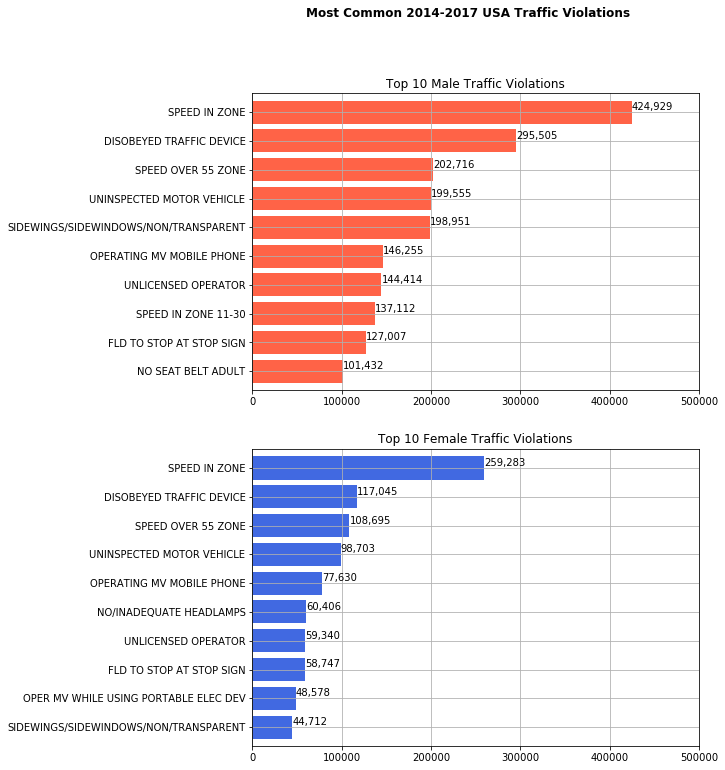

In [9]:
gender_bar_plot, (male_ax, female_ax) = plt.subplots(2, 1, figsize=(8, 12))

top_male_violations.plot(
    kind="barh", 
    ax=male_ax, 
    width=0.8,
    title="Top 10 Male Traffic Violations", 
    color="tomato"
) 

top_female_violations.plot(
    kind="barh", 
    ax=female_ax, 
    width=0.8,
    title="Top 10 Female Traffic Violations", 
    color="royalblue"
) 
    
gender_bar_plot.suptitle("Most Common 2014-2017 USA Traffic Violations", fontweight="bold")

for ax in (male_ax, female_ax):    
    ax.invert_yaxis()
    ax.set_xlim(right=500000)
    ax.grid()


for i in range(len(top_male_violations)):  
    male_ax.text(top_male_violations[i], i-.075, '{:,}'.format(top_male_violations[i]))
    female_ax.text(top_female_violations[i], i-.075, '{:,}'.format(top_female_violations[i]))

gender_bar_plot.savefig("gender-bar.jpg", bbox_inches="tight", pad_inches=0.2, dpi=100)